In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
train = pd.read_csv('Pictures//train.csv')
test = pd.read_csv('Pictures//test.csv')

In [3]:
print("Train Shape: ",train.shape)
print("Test Shape: ",test.shape)

Train Shape:  (1460, 81)
Test Shape:  (1459, 80)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<AxesSubplot:>

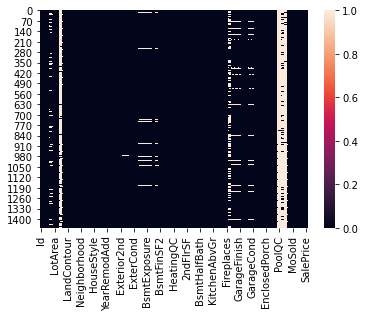

In [7]:
sns.heatmap(train.isnull())

In [8]:
print(test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


<AxesSubplot:>

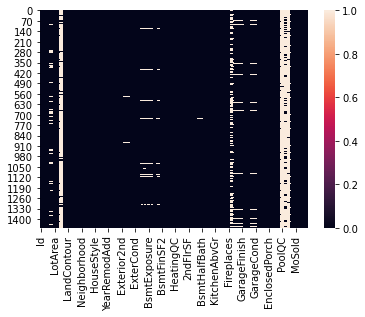

In [9]:
sns.heatmap(test.isnull())

In [10]:
cat_col_train = ['FireplaceQu','GarageType','GarageFinish','MasVnrType','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
          'GarageQual','GarageCond']

ncat_col_train = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [11]:
for i in cat_col_train:
    train[i] = train[i].fillna(train[i].mode()[0])
    
for j in ncat_col_train:
    train[j] = train[j].fillna(train[j].mean())

In [12]:
cat_col_test = ['FireplaceQu','GarageType','GarageFinish','MasVnrType','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
          'GarageQual','GarageCond','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']

ncat_col_test = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
                'BsmtHalfBath','GarageCars','GarageArea']

In [13]:
for i in cat_col_test:
    test[i] = test[i].fillna(test[i].mode()[0])
    
for j in ncat_col_test:
    test[j] = test[j].fillna(test[j].mean())

In [14]:
to_drop = ['Id','Alley','PoolQC','Fence','MiscFeature']

for k in to_drop:
    train.drop([k], axis = 1, inplace = True)
    test.drop([k], axis = 1, inplace = True)

<AxesSubplot:>

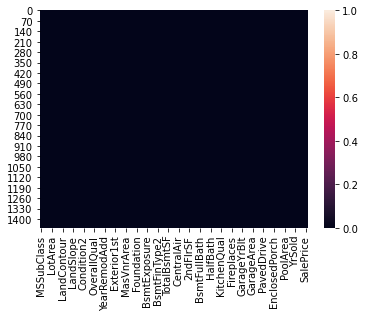

In [15]:
sns.heatmap(train.isnull())

<AxesSubplot:>

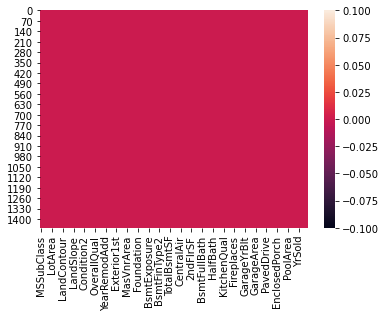

In [16]:
sns.heatmap(test.isnull())

In [17]:
print("Train Shape: ",train.shape)
print("Test Shape: ",test.shape)

Train Shape:  (1460, 76)
Test Shape:  (1459, 75)


In [18]:
final_df = pd.concat([train,test], axis = 0)
final_df.shape

(2919, 76)

In [19]:
all_cat_col = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
              'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
              'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
              'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
              'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
              'GarageCond','PavedDrive','SaleType','SaleCondition']

In [20]:
def cat_onehot_encoding(multicol):
    df_final = final_df
    i = 0
    for fields in multicol:
        print(fields)
        df1 = pd.get_dummies(final_df[fields],drop_first = True)
        
        final_df.drop([fields], axis = 1, inplace = True)
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1], axis=1)
        i = i+1
    
    df_final = pd.concat([final_df,df_final], axis = 1)
    
    return df_final

In [21]:
final_df = cat_onehot_encoding(all_cat_col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [22]:
final_df.shape

(2919, 237)

In [23]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2919, 177)

In [24]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [25]:
df_test.drop(['SalePrice'], axis = 1, inplace = True)

C:\Users\TAHIMA\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
print("Train Shape: ",df_train.shape)
print("Test Shape: ",df_test.shape)

Train Shape:  (1460, 177)
Test Shape:  (1459, 176)


In [27]:
x_train = df_train.drop(['SalePrice'], axis = 1)
y_train = df_train['SalePrice']

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
param = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2,3,5,10,15],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'min_child_weight': [1,2,3,4],
    'booster': ['gbtree','gblinear'],
    'base_score': [0.25, 0.5, 0.75, 1]
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
random_cv = RandomizedSearchCV(estimator=xgb_model,
                              param_distributions = param,
                              cv=5, n_iter=50,
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state = 42)
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   56.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 17.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 24.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_ite

In [33]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
xgb_model = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, monotone_constraints='()',
       n_estimators=900, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
f = "xgb_model.pkl"
pickle.dump(xgb_model,open(f,'wb'))

In [36]:
pred_xgb = xgb_model.predict(df_test)
print(pred_xgb.shape)

(1459,)


In [37]:
sub_df = pd.read_csv('Pictures//sample_submission.csv')
sub_df['SalePrice'] = pred_xgb
sub_df.to_csv('sample_sub_xgb.csv', index = False)

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [39]:
pred_dt = dt_model.predict(df_test)
print(pred_dt.shape)

(1459,)


In [40]:
#sub_df = pd.read_csv('Pictures//sample_submission.csv')
#sub_df['SalePrice'] = pred_dt
#sub_df.to_csv('sample_sub_dt.csv', index = False)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [42]:
from keras import backend as k
def root_mean_squared_error(y_true, y_pred):
    return k.sqrt(k.mean(k.square(y_pred - y_true)))

In [43]:
nn_model = Sequential()

nn_model.add(Dense(50, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 176))
nn_model.add(Dense(25, kernel_initializer = 'he_uniform', activation = 'relu'))
nn_model.add(Dense(50, kernel_initializer = 'he_uniform', activation = 'relu'))
nn_model.add(Dense(1, kernel_initializer = 'he_uniform'))

nn_model.compile(loss = root_mean_squared_error, optimizer = 'Adamax')

nn_model.fit(x_train.values, y_train.values, validation_split = 0.25, batch_size = 10, epochs = 1000)

Epoch 1/1000
110/110 [==============================] - 5s 9ms/step - loss: 179300.9688 - val_loss: 150263.1562
Epoch 2/1000
110/110 [==============================] - 0s 3ms/step - loss: 105351.3672 - val_loss: 64376.5859
Epoch 3/1000
110/110 [==============================] - 0s 3ms/step - loss: 70635.4609 - val_loss: 62517.2539
Epoch 4/1000
110/110 [==============================] - 0s 3ms/step - loss: 68550.9453 - val_loss: 61082.1211
Epoch 5/1000
110/110 [==============================] - 0s 3ms/step - loss: 66125.4531 - val_loss: 59825.0430
Epoch 6/1000
110/110 [==============================] - 0s 3ms/step - loss: 64294.2188 - val_loss: 58517.9453
Epoch 7/1000
110/110 [==============================] - 0s 3ms/step - loss: 61694.2969 - val_loss: 57199.0977
Epoch 8/1000
110/110 [==============================] - 0s 3ms/step - loss: 60140.7734 - val_loss: 56099.9961
Epoch 9/1000
110/110 [==============================] - 0s 3ms/step - loss: 58638.4297 - val_loss: 55010.3984
Epoch 1

In [44]:
nn_model.save('nn_model.h5')

In [45]:
pred_nn = nn_model.predict(df_test)
print(pred_nn.shape)

(1459, 1)


In [46]:
sub_df = pd.read_csv('Pictures//sample_submission.csv')
sub_df['SalePrice'] = pred_nn
sub_df.to_csv('sample_sub_nn.csv', index = False)